In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('data.csv',encoding='cp1252')

In [0]:
data[0:10]

,uid,qid,question,answer,score,spellingErrors,grammarErrors
0,10,3,Mobile phones are a menace,nad showed lots of suggestions so see what it ...,0.00,1,0
1,25,3,Mobile phones are a menace,I Know but can't live with them...,0.00,0,0
2,25,3,Mobile phones are a menace,<script>\n\nwindow.alertI(\,0.00,1,2
3,25,3,Mobile phones are a menace,<script>\n\nwindow.alert(\,0.00,0,2
4,88,4,01. It is important to learn social and mathem...,"In order to improve our logical ability, it is...",9.50,2,0
5,28,4,01. It is important to learn social and mathem...,It is important to learn social and mathematic...,9.29,0,2
6,35,4,01. It is important to learn social and mathem...,"First going to agree with the quotation, why s...",7.07,0,5
7,307,4,01. It is important to learn social and mathem...,Every subject is important and they have their...,4.69,4,12
8,310,4,01. It is important to learn social and mathem...,It is really important to learn social and mat...,8.28,1,5
9,92,4,01. It is important to learn social and mathem...,The most common subjects in our childhood are ...,9.08,1,2


In [0]:
data.shape

(17412, 7)

In [0]:
ques = data['question']
ques = list(set(ques))
print(len(ques))

170


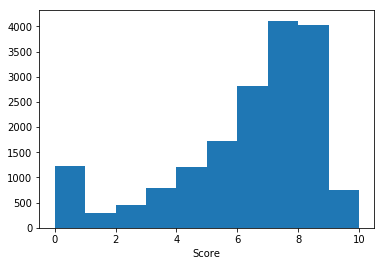

In [0]:
plt.hist(data['score'])
plt.xlabel("Score")
plt.show()

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
word_net_lemmatizer = WordNetLemmatizer()
def preprocess(text):
  letters_only = re.sub('[^a-zA-Z]'," ",text)
  words = letters_only.lower().split()
  stpwords = set(stopwords.words("english"))
  clean_words = list(set([w for w in words if w not in stpwords]))
  lemmatized_words = list(set([word_net_lemmatizer.lemmatize(w) for w in clean_words]))
  return lemmatized_words

In [0]:
res=""
for ans in data['answer']:
  res+=str(ans)
for ques in data['question']:
  res+=str(ques)

<class 'list'>


In [0]:
documents=[]
for ans in data['answer']:
  documents.append(ans)
for ques in data['question']:
  documents.append(ques)
print(documents[0:5])

['nad showed lots of suggestions so see what it shows now.', "I Know but can't live with them...", '<script>\\n\\nwindow.alertI(\\', '<script>\\n\\nwindow.alert(\\', 'In order to improve our logical ability, it is more important to learn mathematics and also in order to know about the ethical values we need to learn the social which improves the knowledge. Nowadays, most of the children have no idea about the social, the duty of their parents is to teach ethical values, Not only the parents but also the responsibility of the teachers to teach about the values. It improves more and more knowledge and also increases our thinking ability which makes our mind power strengthen. The maths problems that which we solve makes our mind think in different possible ways and also gains the practical knowledge. Today the education system also depends upon the problem-solving. The learning of social knows about the ethical values and knows about our past generations and knows about the culture. The l

In [0]:
mod_document=[]
def preprocess_doc(line):
    modified=[]
    modified=re.sub('[^a-zA-z]'," ",str(line))
    mod_document.extend([modified])

for i in range(len(documents)):
  preprocess_doc(documents[i])

In [0]:
mod_document[0:5]

['nad showed lots of suggestions so see what it shows now ',
 'I Know but can t live with them   ',
 ' script \\n\\nwindow alertI \\',
 ' script \\n\\nwindow alert \\',
 'In order to improve our logical ability  it is more important to learn mathematics and also in order to know about the ethical values we need to learn the social which improves the knowledge  Nowadays  most of the children have no idea about the social  the duty of their parents is to teach ethical values  Not only the parents but also the responsibility of the teachers to teach about the values  It improves more and more knowledge and also increases our thinking ability which makes our mind power strengthen  The maths problems that which we solve makes our mind think in different possible ways and also gains the practical knowledge  Today the education system also depends upon the problem solving  The learning of social knows about the ethical values and knows about our past generations and knows about the culture  T

In [0]:
vocab = preprocess(res)


In [0]:
vocab.index('mobile')

319

In [0]:
len(vocab)

29492

In [0]:
from gensim.models import Word2Vec

In [0]:
model = Word2Vec([vocab],size=300,window=10,min_count=1,workers=10)

model.train(mod_document,total_examples=len(mod_document),epochs=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(135353270, 207714570)

In [0]:
type(model['mobile'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [0]:
query1="It is important to learn social and mathematics rather than history and literature."
answer1="In order to improve our logical ability, it is more important to learn mathematics and also in order to know about the ethical values we need to learn the social which improves the knowledge. Nowadays, most of the children have no idea about the social, the duty of their parents is to teach ethical values, Not only the parents but also the responsibility of the teachers to teach about the values. It improves more and more knowledge and also increases our thinking ability which makes our mind power strengthen. The maths problems that which we solve makes our mind think in different possible ways and also gains the practical knowledge. Today the education system also depends upon the problem-solving. The learning of social knows about the ethical values and knows about our past generations and knows about the culture. The learnings of social gain the knowledge of our ancient history and our civilizations and about the kingdoms and the importance of our religions which makes our mind more peaceful and also we know about the prominent history of our country, our traditions, etc. Nowadays, all are not familiar with our ancient history, If read our social we came to know about the background knowledge of our culture, the environment in our past days and also the customs and traditions. Leaning all these make our good attitude and develop our skills and the good behavior in our society. The above all things makes our lives flexible, It is responsible for each and every individual to share the ethical knowledge to other people so that each and every individual learn the things and develop the knowledge. It is important to know the social and mathematics in order to improve our knowledge and ethical values that knows about the importance of the people and the society."  

In [0]:
from scipy.spatial import distance
import scipy
import numpy as np
def cosine_similarity(query,answer):
  vector1 = np.mean([model[word] for word in preprocess(query) if word in w2vmodel.wv.vocab],axis=0)
  vector2 = np.mean([model[word] for word in preprocess(answer) if word in w2vmodel.wv.vocab],axis=0)
  sim = scipy.spatial.distance.cosine(vector1,vector2)
  print(sim)

In [0]:
cosine_similarity(query1,answer1)

0.706404983997345


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
stpwords = set(stopwords.words("english"))

In [0]:
def TF(term,doc):
    doc_wordcount = {}
    filtered = preprocess(doc)
    for word in filtered:
        count = doc_wordcount.get(word,0)
        doc_wordcount[word] = count + 1
    #print(doc_wordcount)
    return doc_wordcount[term]/len(doc)

In [0]:
import math
def IDF(term,vocab):
    DF = 0
    for doc in vocab:
       if term in doc:
        DF = DF+1
    return math.log2(len(vocab)/DF)

In [0]:
def TF_IDF(term, vocab):
    tf = TF(term, vocab[0])
    idf = IDF(term, vocab)
    return tf*idf

In [0]:
from scipy.spatial import distance
import scipy
import numpy as np
def cosine_similarity_sif(query,answer):
  vector1 = np.mean([(0.001/(TF(word,query)+0.001))*model[word] for word in preprocess(query) if word in w2vmodel.wv.vocab],axis=0)
  vector2 = np.mean([(0.001/(TF(word,answer)+0.001))*model[word] for word in preprocess(answer) if word in w2vmodel.wv.vocab],axis=0)
  sim = scipy.spatial.distance.cosine(vector1,vector2)
  print(sim)

In [0]:
cosine_similarity_sif(query1,answer1)

0.706404983997345


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
query2="Mobile phones are a menace"
answer2="From my point of view mobile phones have advantges and disadvantages. Some people think that mobile phones are harmful and some think they are useful. Firstly i will discuss how mobile phones are a blessing and the good things that they hold. This is a constant issue of debate particularly between this generation and older generations. A mobile phone can distract people from things that they should be concentrating on. \n                                           Later moving towards advantages, it is used to connect people. On the other hand having a mobile phone can be a great thing. Whenever people want to go anywhere they need mobile to book tickets. Nowadays internet takes a prominent role in our society. It is useful to know anything which are happening in our society. Mostly people are finding their knowledge by using mobiles. Apart of advantages, mobile phoes have disadvantages. It ruins the people mind. People are misusing mobiles in a wrong manner. People are badly addicting towards mobiles. Moreover, people are going to find the enjoyment by using mobiles. However this invention change the people behaiour. This is the main reason to become a slave of it. Mostly students are addicting towards it. Those are misusing this one in a different path. \n                                            Coming to conclusion, molbile phones have adverse effects on people who are roaming in our world. People has to use this invention in an appropriate manner. By misusing this one will be a punnishable offence. People do not change their mind by adding towards it. They have to use it in a useful manner. People have to take care of their eyes while using mobiles. Government have to provide some acts whilch are useful to avoid mobiles. This will be useful to change our society with good manner. Finally, one has to use mobiles for their uses not for their misuse"
cosine_similarity_sif(query2,answer2)

0.915619395673275


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
